## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
import pandas as pd

## Combining and merging data sets

In [2]:
df1 = pd.DataFrame({'data1' : range(7), 'key' : list('bbacaab')})
df2 = pd.DataFrame({'data2' : range(20,23), 'key' : list('abd')})

In [3]:
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2

,data2,key
0,20,a
1,21,b
2,22,d


In [6]:
df1.merge(df2)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [7]:
df2.merge(df1)

,data2,key,data1
0,20,a,2
1,20,a,4
2,20,a,5
3,21,b,0
4,21,b,1
5,21,b,6


In [8]:
df2_wdups = pd.DataFrame({'data2' : range(20,24), 'key' : list('abda')})
df2_wdups

,data2,key
0,20,a
1,21,b
2,22,d
3,23,a


In [9]:
df1.merge(df2_wdups)

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,2,a,23
5,4,a,20
6,4,a,23
7,5,a,20
8,5,a,23


In [10]:
df3 = pd.DataFrame({'data1' : range(7), 'lkey' : list('bbacaab')})
df4 = pd.DataFrame({'data2' : range(3), 'rkey' : list('abd')})

In [11]:
df3

,data1,lkey
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [12]:
df4

,data2,rkey
0,0,a
1,1,b
2,2,d


In [14]:
df3.merge(df4, left_on='lkey', right_on='rkey')

,data1,lkey,data2,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [15]:
df1.merge?

In [17]:
df1.merge(df2, how='inner')

,data1,key,data2
0,0,b,21
1,1,b,21
2,6,b,21
3,2,a,20
4,4,a,20
5,5,a,20


In [18]:
df1.merge(df2, how='outer')

,data1,key,data2
0,0.0,b,21.0
1,1.0,b,21.0
2,6.0,b,21.0
3,2.0,a,20.0
4,4.0,a,20.0
5,5.0,a,20.0
6,3.0,c,NaN
7,NaN,d,22.0


In [20]:
df1.merge(df2, how='left')

,data1,key,data2
0,0,b,21.0
1,1,b,21.0
2,2,a,20.0
3,3,c,NaN
4,4,a,20.0
5,5,a,20.0
6,6,b,21.0


In [21]:
df1.merge(df2, how='right')

,data1,key,data2
0,0.0,b,21
1,1.0,b,21
2,6.0,b,21
3,2.0,a,20
4,4.0,a,20
5,5.0,a,20
6,NaN,d,22


In [22]:
df1['X'] = 2
df2['X'] = 42

In [24]:
df1.merge(df2, on='key')

,data1,key,X_x,data2,X_y
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


In [26]:
df1.merge(df2, on='key', suffixes=['_left','_right'])

,data1,key,X_left,data2,X_right
0,0,b,2,21,42
1,1,b,2,21,42
2,6,b,2,21,42
3,2,a,2,20,42
4,4,a,2,20,42
5,5,a,2,20,42


### Merging on index

In [27]:
df1

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [28]:
df5= pd.DataFrame({'g': range(4), 'h': range(8,12)}, index =list('abcd'))
df5

,g,h
a,0,8
b,1,9
c,2,10
d,3,11


In [31]:
df1.merge(df5, left_on='key', right_index=True)

,data1,key,X,g,h
0,0,b,2,1,9
1,1,b,2,1,9
6,6,b,2,1,9
2,2,a,2,0,8
4,4,a,2,0,8
5,5,a,2,0,8
3,3,c,2,2,10


### Concatenating along an axis

In [32]:
pd.concat([df1,df5])

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,g,h,key
0,2.0,0.0,NaN,NaN,b
1,2.0,1.0,NaN,NaN,b
2,2.0,2.0,NaN,NaN,a
3,2.0,3.0,NaN,NaN,c
4,2.0,4.0,NaN,NaN,a
5,2.0,5.0,NaN,NaN,a
6,2.0,6.0,NaN,NaN,b
a,NaN,NaN,0.0,8.0,NaN
b,NaN,NaN,1.0,9.0,NaN
c,NaN,NaN,2.0,10.0,NaN


In [33]:
import numpy as np

In [35]:
a1 = np.arange(0,24).reshape(4,6)
a1

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [36]:
a2 = np.arange(25,37).reshape(4,3)
a2

array([[25, 26, 27],
       [28, 29, 30],
       [31, 32, 33],
       [34, 35, 36]])

In [37]:
a3 = np.concatenate([a1,a2], axis=1)
a3

array([[ 0,  1,  2,  3,  4,  5, 25, 26, 27],
       [ 6,  7,  8,  9, 10, 11, 28, 29, 30],
       [12, 13, 14, 15, 16, 17, 31, 32, 33],
       [18, 19, 20, 21, 22, 23, 34, 35, 36]])

In [38]:
a4 = np.concatenate([a1,a2], axis=0)
a4

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [39]:
s1 = pd.Series(range(4), index=list('abcd'))
s2 = pd.Series(range(10,13), index=list('lmn'))
s3 = pd.Series(range(40,43), index=list('xyz'))
s1,s2,s3

(a    0
 b    1
 c    2
 d    3
 dtype: int64, l    10
 m    11
 n    12
 dtype: int64, x    40
 y    41
 z    42
 dtype: int64)

In [42]:
pd.concat([s1, s2, s3])

a     0
b     1
c     2
d     3
l    10
m    11
n    12
x    40
y    41
z    42
dtype: int64

In [43]:
pd.concat([s1, s2, s3], axis=1)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [44]:
pd.concat([s1, s2, s3], axis=1, keys=['s1', 's2', 's3'])

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,s1,s2,s3
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,2.0,NaN,NaN
d,3.0,NaN,NaN
l,NaN,10.0,NaN
m,NaN,11.0,NaN
n,NaN,12.0,NaN
x,NaN,NaN,40.0
y,NaN,NaN,41.0
z,NaN,NaN,42.0


In [45]:
pd.concat([df1, df2])

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
0,42,NaN,20.0,a
1,42,NaN,21.0,b
2,42,NaN,22.0,d


In [46]:
pd.concat([df1, df2], ignore_index=True)

/home/gonzalo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,X,data1,data2,key
0,2,0.0,NaN,b
1,2,1.0,NaN,b
2,2,2.0,NaN,a
3,2,3.0,NaN,c
4,2,4.0,NaN,a
5,2,5.0,NaN,a
6,2,6.0,NaN,b
7,42,NaN,20.0,a
8,42,NaN,21.0,b
9,42,NaN,22.0,d


### Digression

In [47]:
pd.concat = df1

In [48]:
pd.concat([s1, s2])

TypeError: 'DataFrame' object is not callable

In [49]:
pd.concat

,data1,key,X
0,0,b,2
1,1,b,2
2,2,a,2
3,3,c,2
4,4,a,2
5,5,a,2
6,6,b,2


In [50]:
del(pd.concat)

In [51]:
pd.concat?

Object `pd.concat` not found.


In [52]:
import imp

In [53]:
imp.reload(pd)

<module 'pandas' from '/home/gonzalo/anaconda3/lib/python3.7/site-packages/pandas/__init__.py'>

In [54]:
pd.concat

<function pandas.core.reshape.concat.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)>

# Data Transformation 

## Remove duplicates

In [55]:
### Para el challenge de AMADEUS ###

In [56]:
df6 =  pd.DataFrame({'key1':['one']*3 + ['two']*4,
                    'key2':[1,1,2,3,3,4,4]})

In [57]:
df6

,key1,key2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [58]:
df6.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [59]:
df6[df6.duplicated()]

,key1,key2
1,one,1
4,two,3
6,two,4


In [70]:
df6.drop_duplicates(keep='first')

,key1,key2
0,one,1
2,one,2
3,two,3
5,two,4


### Renaming axis indexes

In [71]:
df6.index = list('plfjdmh')
df6

,key1,key2
p,one,1
l,one,1
f,one,2
j,two,3
d,two,3
m,two,4
h,two,4


In [73]:
df6.index = df6['key1']
df6

,key1,key2
key1,,
one,one,1
one,one,1
one,one,2
two,two,3
two,two,3
two,two,4
two,two,4


### Discretization and binning

In [74]:
ages = [18, 25, 22, 45, 91, 67, 20, 38, 38, 56]

In [75]:
bins = [18, 25, 35, 65, 100]

In [76]:
points = [3, 1, 4, 2]

In [77]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

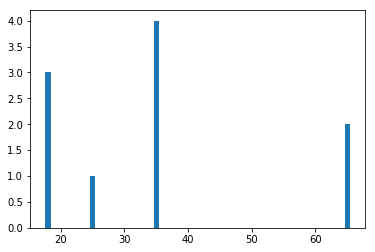

In [81]:
plt.bar(bins[:-1], points)

In [83]:
cuts = pd.cut(ages, bins)
cuts.value_counts()

(18, 25]     3
(25, 35]     0
(35, 65]     4
(65, 100]    2
dtype: int64

In [84]:
cuts = pd.cut(ages, bins, right=False)
cuts.value_counts()

[18, 25)     3
[25, 35)     1
[35, 65)     4
[65, 100)    2
dtype: int64

(array([3., 1., 4., 2.]),
 array([ 18,  25,  35,  65, 100]),
 <a list of 4 Patch objects>)

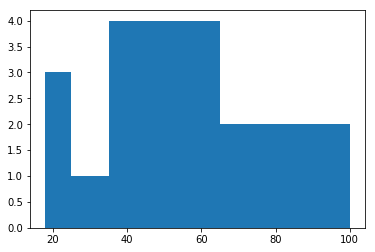

In [85]:
plt.hist(ages, bins=bins)

## String manipulation

### String object methods

In [86]:
string = 'this is some sentence'
string.split()

['this', 'is', 'some', 'sentence']

### Vectorized string functions in pandas

[Vectorized string functions in pandas](https://pandas.pydata.org/pandas-docs/stable/text.html) are grouped within the .str attribute of Series and Indexes. They have the same names as the regular Python string functions, but work on Series of strings.

In [87]:
animals = 'rhino giraffe molerat mantisshrimp cheetah mosquito whale'.split()
animals

['rhino', 'giraffe', 'molerat', 'mantisshrimp', 'cheetah', 'mosquito', 'whale']

In [90]:
list(map(lambda x: x.capitalize(), animals))

['Rhino', 'Giraffe', 'Molerat', 'Mantisshrimp', 'Cheetah', 'Mosquito', 'Whale']

In [91]:
list(map(lambda x: x.lower(), animals))

['rhino', 'giraffe', 'molerat', 'mantisshrimp', 'cheetah', 'mosquito', 'whale']

In [92]:
df1['animals'] = animals

In [93]:
df1

,data1,key,X,animals
0,0,b,2,rhino
1,1,b,2,giraffe
2,2,a,2,molerat
3,3,c,2,mantisshrimp
4,4,a,2,cheetah
5,5,a,2,mosquito
6,6,b,2,whale


In [94]:
animals_series = df1['animals']
animals_series

0           rhino
1         giraffe
2         molerat
3    mantisshrimp
4         cheetah
5        mosquito
6           whale
Name: animals, dtype: object

In [96]:
animals_series.str

In [97]:
animals_series.str.upper()

0           RHINO
1         GIRAFFE
2         MOLERAT
3    MANTISSHRIMP
4         CHEETAH
5        MOSQUITO
6           WHALE
Name: animals, dtype: object

In [98]:
animals_series.str.count('o')

0    1
1    0
2    1
3    0
4    0
5    2
6    0
Name: animals, dtype: int64

In [99]:
animals_series.str.contains('m')

0    False
1    False
2     True
3     True
4    False
5     True
6    False
Name: animals, dtype: bool

In [100]:
df1[animals_series.str.contains('m')]

,data1,key,X,animals
2,2,a,2,molerat
3,3,c,2,mantisshrimp
5,5,a,2,mosquito


In [101]:
df1['animals'] = df1['animals'].str.upper()
df1

,data1,key,X,animals
0,0,b,2,RHINO
1,1,b,2,GIRAFFE
2,2,a,2,MOLERAT
3,3,c,2,MANTISSHRIMP
4,4,a,2,CHEETAH
5,5,a,2,MOSQUITO
6,6,b,2,WHALE


In [102]:
series_with_blanks = pd.Series(['SDF    ', ' RTTR     ', 'BL   '])
series_with_blanks

0       SDF    
1     RTTR     
2         BL   
dtype: object

In [103]:
series_with_blanks.str.rstrip()

0      SDF
1     RTTR
2       BL
dtype: object